## Подключаем библиотеки и использую телеком датасет

In [49]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
import pylab as plt

In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

In [4]:
data = pd.read_csv('../../data/telecom_churn.csv')

In [5]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data.drop(['State', 'Voice mail plan'], axis = 1, inplace = True)

In [10]:
data['International plan'] = data['International plan'].map( {'Yes': 1, 'No': 0} )

In [11]:
data['International plan'] 

0       0
1       0
2       0
3       1
4       1
       ..
3328    0
3329    0
3330    0
3331    1
3332    0
Name: International plan, Length: 3333, dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          3333 non-null   int64  
 1   Area code               3333 non-null   int64  
 2   International plan      3333 non-null   int64  
 3   Number vmail messages   3333 non-null   int64  
 4   Total day minutes       3333 non-null   float64
 5   Total day calls         3333 non-null   int64  
 6   Total day charge        3333 non-null   float64
 7   Total eve minutes       3333 non-null   float64
 8   Total eve calls         3333 non-null   int64  
 9   Total eve charge        3333 non-null   float64
 10  Total night minutes     3333 non-null   float64
 11  Total night calls       3333 non-null   int64  
 12  Total night charge      3333 non-null   float64
 13  Total intl minutes      3333 non-null   float64
 14  Total intl calls        3333 non-null   

## Выделим целевой признак 


In [15]:
y = data['Churn'].astype('int')   # churn - уйдет/не уйдет
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: Churn, Length: 3333, dtype: int32


In [16]:
X = data.drop('Churn', axis = 1)

In [92]:
X.shape, y.shape

((3333, 17), (3333,))

In [97]:
features = list(X.columns.values )

## Кроссвалидация и отложенная выборка

In [25]:
from sklearn.model_selection import train_test_split, cross_val_score

In [20]:
train_test_split?

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [21]:
X_train, X_valid, y_train, y_valid = train_test_split(X,y, test_size = 0.3, random_state = 17)

In [22]:
X_train.shape, X_valid.shape

((2333, 17), (1000, 17))

In [24]:
first_tree = DecisionTreeClassifier(random_state = 17)

In [26]:
 cross_val_score?

Signature:
cross_val_score(
    estimator,
    X,
    y=None,
    *,
    groups=None,
    scoring=None,
    cv=None,
    n_jobs=None,
    verbose=0,
    fit_params=None,
    pre_dispatch='2*n_jobs',
    error_score=nan,
)
Docstring:
Evaluate a score by cross-validation.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like of shape (n_samples, n_features)
    The data to fit. Can be for example a list, or an array.

y : array-like of shape (n_samples,) or (n_samples, n_outputs),             default=None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like of shape (n_samples,), default=None
    Group labels for the samples used while splitting the dataset into
    train/test set. Only used in conjunction with a "Group" :term:`cv`
    instance (e.g., :class:`GroupKFold`).

scoring : str or callable, default=None

In [29]:
cross_val_score(first_tree, X_train, y_train, cv=5)

array([0.9143469 , 0.91220557, 0.92077088, 0.90772532, 0.91416309])

In [31]:
np.mean(cross_val_score(first_tree, X_train, y_train, cv=5))

0.9138423504976518

In [41]:
first_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=17)

In [91]:
from sklearn.tree import plot_tree

In [100]:
plt.figure(figsize=(8, 6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

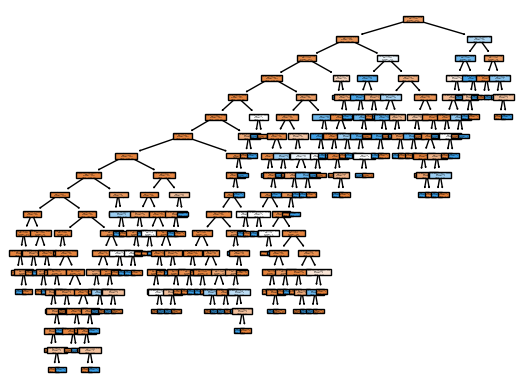

In [101]:
plot_tree(first_tree, feature_names=features, filled=True);

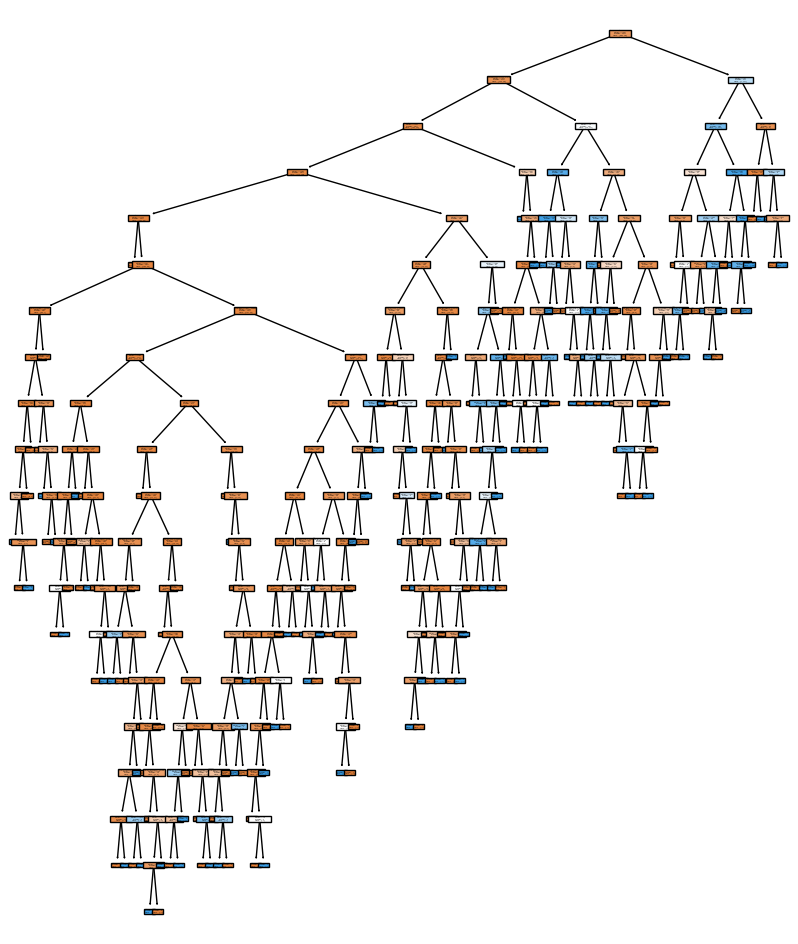

In [105]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, y)

plt.figure(figsize=(10, 12))
plot_tree(tree, feature_names=features, filled=True);

## predict() и accuracy_score

In [42]:
pred = first_tree.predict(X_valid)


In [104]:
cross_val_score(first_tree, X_valid, pred)

array([0.885, 0.885, 0.86 , 0.885, 0.86 ])

In [56]:
np.mean(cross_val_score(first_tree, X_valid, pred, cv=5))

0.875

In [133]:
valid = y_valid.values
from sklearn.metrics import accuracy_score

In [136]:
accuracy_score(valid, pred)

0.916